<span style="font-size:25px; font-weight:bold">Glassdoor Project</span>

<span style="font-size:15px"><strong>Project Type</strong> - EDA and Regression</span>

<span style="font-size:25px; font-weight:bold">Project Summary </span>

This project aimed to analyze and predict salary ranges—specifically, minimum, maximum, and average salaries—for data-related job postings using a cleaned and structured dataset sourced from Glassdoor. The process began with thorough data preprocessing, which involved handling missing values, extracting structured salary values from unstructured text (e.g., converting "\$53K-\$91K" to numeric ranges), and standardizing job titles into meaningful categories (e.g., 'Data Scientist', 'Data Engineer', etc.). Additional preprocessing included encoding categorical variables such as company size, sector, revenue, location, and type of ownership to make them suitable for machine learning models.

Exploratory Data Analysis (EDA) was conducted to gain insights into the distribution of jobs, salaries, and company characteristics. Various visualizations were created, including bar plots for job count by state and sector, box plots comparing average salaries across sectors and company sizes, pie charts for ownership distribution, and a correlation heatmap to assess feature relationships. Hypothesis testing was also performed to statistically validate patterns observed during EDA—such as whether job location or sector significantly influences salary—with p-values confirming or rejecting those assumptions.

For the predictive modeling phase, the dataset was split into features (X) and targets (Y: Min Salary, Max Salary, Avg Salary), followed by a standard 80-20 train-test split. Multiple regression models were evaluated: Linear Regression, Random Forest Regressor, Gradient Boosting Regressor, and XGBoost Regressor. While Linear Regression performed poorly due to its sensitivity to non-linearity and multicollinearity in features, ensemble-based models like Random Forest and XGBoost delivered strong performance with R² scores around 0.7 or higher and relatively low mean absolute errors (MAE). These models effectively captured complex patterns and interactions within the data.

In summary, the project showcased the end-to-end data science workflow—data cleaning, exploratory analysis, hypothesis testing, model development, and performance evaluation—to build a robust salary prediction system. It demonstrated that with proper preprocessing and model selection, machine learning can accurately forecast salary ranges, providing valuable insights for job seekers, employers, and HR professinals.



<span style="font-size:25px; font-weight:bold">Github Link </span>

https://github.com/aritra123x/Glassdoor-Forecasting

<span style="font-size:25px; font-weight:bold">Problem Statement </span>


The objective of this project is to analyze and predict the minimum, maximum, and average salaries for various data-related job roles using a dataset sourced from Glassdoor. The dataset includes job descriptions, company details, salary estimates, and other relevant attributes. The goal is to build machine learning models that can accurately estimate salary ranges based on features such as job title, company size, location, industry sector, and company revenue. This helps in understanding key salary determinants and aids job seekers, recruiters, and organizations in making informed decision.


<span style="font-size:20px">Importing Libraries</span>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

<span style="font-size:20px">Dataset Loading</span>

In [2]:
df=pd.read_csv('glassdoor_jobs.csv')

<span style="font-size:20px">Viewing Dataset</span>

In [5]:
df.head()

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa..."
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"


<span style="font-size:15px">Dataset Rows and Columns Count</span>

In [7]:
df.shape

(956, 15)

<span style="font-size:15px">Dataset Information</span>

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 956 entries, 0 to 955
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         956 non-null    int64  
 1   Job Title          956 non-null    object 
 2   Salary Estimate    956 non-null    object 
 3   Job Description    956 non-null    object 
 4   Rating             956 non-null    float64
 5   Company Name       956 non-null    object 
 6   Location           956 non-null    object 
 7   Headquarters       956 non-null    object 
 8   Size               956 non-null    object 
 9   Founded            956 non-null    int64  
 10  Type of ownership  956 non-null    object 
 11  Industry           956 non-null    object 
 12  Sector             956 non-null    object 
 13  Revenue            956 non-null    object 
 14  Competitors        956 non-null    object 
dtypes: float64(1), int64(2), object(12)
memory usage: 112.2+ KB


<span style="font-size:15px">Statistical Summary Of Dataset</span>

In [11]:
df.describe()

,Unnamed: 0,Rating,Founded
count,956.000000,956.000000,956.000000
mean,477.500000,3.601255,1774.605649
std,276.117729,1.067619,598.942517
min,0.000000,-1.000000,-1.000000
25%,238.750000,3.300000,1937.000000
50%,477.500000,3.800000,1992.000000
75%,716.250000,4.200000,2008.000000
max,955.000000,5.000000,2019.000000


<span style="font-size:15px">Duplicate Count</span>

In [13]:
df.apply(lambda col: col.duplicated().sum())

Unnamed: 0             0
Job Title            628
Salary Estimate      539
Job Description      360
Rating               924
Company Name         508
Location             719
Headquarters         721
Size                 947
Founded              847
Type of ownership    943
Industry             893
Sector               931
Revenue              942
Competitors          807
dtype: int64

<span style="font-size:25px">**Handling Of Missing Values and columns**</span>

In [15]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [17]:
df['Company Name'] = df['Company Name'].str.split('\n').str[0]#Removing'/n

In [19]:
df['Min Salary']=df.apply(lambda row: row['Salary Estimate'][:row['Salary Estimate'].find('-')], axis=1)#Min Salary Column

In [21]:
df['Min Salary'] = df.apply(
    lambda row: row['Min Salary'][row['Min Salary'].find(':') + 1:].strip() 
    if row['Min Salary'].startswith('Employer Provided Salary:') 
    else row['Min Salary'], 
    axis=1
)#Min Salry Creation In Specific Cases

In [23]:
for i in range(len(df)):
    if df.iloc[i]['Salary Estimate'].endswith('(Glassdoor est.)'):
        salary_est = df.iloc[i]['Salary Estimate']
        start = salary_est.find('-') + 1
        end = salary_est.find(' ')
        df.at[i, 'Max Salary'] = salary_est[start:end]
        
    elif df.iloc[i]['Salary Estimate'].endswith('(Employer est.)'):
        salary_est = df.iloc[i]['Salary Estimate']
        start = salary_est.find('-') + 1
        end = salary_est.find('(')
        df.at[i, 'Max Salary'] = salary_est[start:end]

    elif df.iloc[i]['Salary Estimate'].startswith('Employer Provided Salary:') and df.iloc[i]['Salary Estimate'].endswith('Per Hour'):
        salary_est = df.iloc[i]['Salary Estimate']
        salary_range = salary_est.replace('Employer Provided Salary:', '').replace('Per Hour', '').strip()
        min_sal, max_sal = salary_range.split('-')
        df.at[i, 'Max Salary'] = max_sal.strip()


    elif df.iloc[i]['Salary Estimate'].startswith('Employer Provided Salary:'):
        salary_est = df.iloc[i]['Salary Estimate']
        start = salary_est.find('-') + 1
        df.at[i, 'Max Salary'] = salary_est[start:]

    #Creation Of Max Salary using specific conditions

In [25]:
df['Max Salary']=df['Max Salary'].replace(np.nan,'')
#Replacing '' with null

In [27]:
def parse_salary(s):
    s = s.strip().replace('$', '')
    if s.endswith('K'):
        return int(float(s.replace('K', '')))  # Annual salary
    else:
        hourly = float(s)
        return int((hourly * 40 * 52)/1000)  # Convert hourly to annual assuming 40 hrs/week


Function to convert String Max_Amount to dollars

In [29]:
df['Min Salary'] = df[df['Min Salary']!='']['Min Salary'].apply(parse_salary)

In [31]:
df['Max Salary'] = df[df['Max Salary']!='']['Max Salary'].apply(parse_salary)

In [33]:
df['Avg Salary']=np.round((df['Max Salary']+df['Min Salary'])/2,decimals=2)

Min Salary Max Salary and Avg Salary are created

In [35]:
df.drop(['Salary Estimate'],axis=1,inplace=True)

In [37]:
df.drop(['Job Description'],axis=1,inplace=True)

Salary Estimation and Job Description Columns are removed as they can't be used to extract more information

In [39]:
df['Rating']=df['Rating'].replace(-1,np.nan)

In [41]:
df['Company Name']=df['Company Name'].replace('<intent>',np.nan)

Replacing Apprropiate missing data with null values

In [43]:
df['Location_State'] = df['Location'].apply(
    lambda x: x[x.find(',')+2:].strip() if ',' in x else x.strip()
)

In [45]:
df.drop(['Location'],axis=1,inplace=True)

Creating Location_State column to store only state and subsequently dropping Location as it is no longer needed

In [47]:
df['Headquarters'] = df['Headquarters'].apply(
    lambda x: x[x.find(',')+2:].strip() if ',' in x else x.strip()
)

Similarly modifying Headquarters column to store only state

In [49]:
df['Headquarters']=df['Headquarters'].replace('-1',np.nan)

In [51]:
df['Size']=df['Size'].replace('-1',np.nan)

In [53]:
df['Founded']=df['Founded'].replace(-1,np.nan)

In [55]:
df['Type of ownership']=df['Type of ownership'].replace('-1',np.nan)

In [57]:
df['Industry']=df['Industry'].replace('-1',np.nan)

In [59]:
df['Sector']=df['Sector'].replace('-1',np.nan)

In [61]:
df['Revenue']=df['Revenue'].replace('-1',np.nan)

In [63]:
df['Competitors']=df['Competitors'].replace('-1',np.nan)

Replacing all -1 with null to check missing data

In [65]:
df.drop(['Industry'],axis=1,inplace=True)

In [593]:
df.isnull().sum()

Job Title              0
Rating                34
Company Name           2
Headquarters          11
Size                  11
Founded               97
Type of ownership     11
Sector                39
Revenue               11
Competitors          634
Min Salary           214
Max Salary           214
Avg Salary           214
Location_State         0
dtype: int64

In [595]:
missing_percent = df.isnull().mean() * 100
print(missing_percent.sort_values(ascending=False))

Competitors          66.317992
Min Salary           22.384937
Max Salary           22.384937
Avg Salary           22.384937
Founded              10.146444
Sector                4.079498
Rating                3.556485
Headquarters          1.150628
Size                  1.150628
Type of ownership     1.150628
Revenue               1.150628
Company Name          0.209205
Job Title             0.000000
Location_State        0.000000
dtype: float64


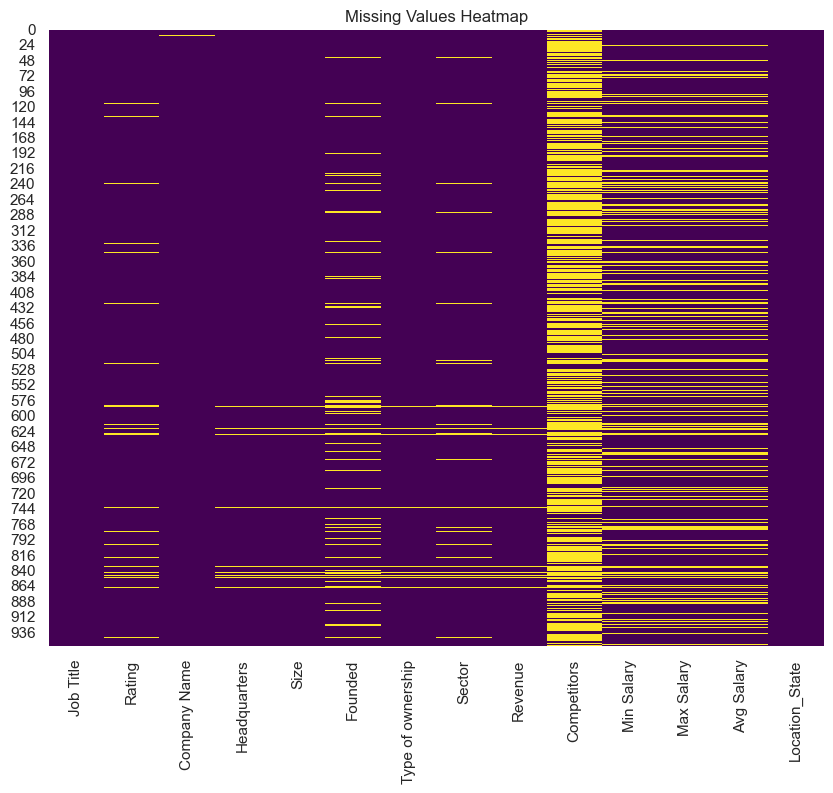

In [598]:
plt.figure(figsize=(10,8))
sns.heatmap(df.isnull(),cbar=False,cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

Heatmap showing missing values

In [67]:
df.drop(['Competitors'],axis=1,inplace=True)

Dropping competitors as there are too many missing values

In [69]:
df['Rating']=df['Rating'].replace(np.nan,df['Rating'].mean())

In [71]:
categorical_cols = ['Company Name', 'Headquarters', 'Size', 'Type of ownership', 'Sector', 'Revenue']
df[categorical_cols] = df[categorical_cols].fillna('Unknown')

In [608]:
df['Founded'] = df['Founded'].fillna(df['Founded'].median())

Replacing 'Categorical Columns' with unknown and numerical cols with median 

In [611]:
def clean_job_title(title):
    title = title.lower()
    if 'data scientist' in title:
        return 'Data Scientist'
    elif 'data analyst' in title:
        return 'Data Analyst'
    elif 'data engineer' in title:
        return 'Data Engineer'
    elif 'machine learning' in title or 'ml engineer' in title:
        return 'ML Engineer'
    elif 'research scientist' in title or 'researcher' in title:
        return 'Research Scientist'
    elif 'manager' in title or 'director' in title or 'lead' in title or 'head' in title:
        return 'Manager/Director'
    elif 'intern' in title or 'junior' in title or 'jr.' in title or 'college' in title:
        return 'Intern/Junior'
    elif 'analyst' in title:
        return 'Other Analyst'
    elif 'scientist' in title:
        return 'Other Scientist'
    else:
        return 'Other'
df['Cleaned Job Title'] = df['Job Title'].apply(clean_job_title)

In [613]:
def categorize_other_roles(title):
    title = title.lower()
    
    if any(k in title for k in ['chief', 'vp', 'head', 'director', 'principal']):
        return 'Manager/Director'
    
    elif 'consultant' in title or 'analytics consultant' in title:
        return 'Other Analyst'
    
    elif 'architect' in title or 'data modeler' in title:
        return 'Other Scientist'
    
    elif 'engineer' in title and any(k in title for k in ['product', 'platform', 'spark', 'systems']):
        return 'Data Engineer'
    
    elif 'analytics' in title or 'data systems specialist' in title or 'data & analytics' in title:
        return 'Other Analyst'
    
    elif 'data science engineer' in title or 'ml' in title:
        return 'ML Engineer'
    
    elif any(k in title for k in ['account exec', 'business development']):
        return 'Manager/Director'
    
    elif 'environmental' in title:
        return 'Other Scientist'
    
    elif 'intern' in title or 'junior' in title:
        return 'Intern/Junior'
    
    elif 'software engineer' in title and 'visualization' in title:
        return 'Data Engineer'
    
    elif 'product engineer' in title and 'data science' in title:
        return 'Data Engineer'
    
    elif 'data management specialist' in title:
        return 'Data Analyst'
    
    else:
        return 'Other'
df.loc[df['Cleaned Job Title'] == 'Other', 'Cleaned Job Title'] = \
    df.loc[df['Cleaned Job Title'] == 'Other', 'Job Title'].apply(categorize_other_roles)


In [615]:
df[df['Cleaned Job Title']=='Other']['Job Title']

496    Technology-Minded, Data Professional Opportuni...
746    Technology-Minded, Data Professional Opportuni...
821         Senior Engineer, Data Management Engineering
Name: Job Title, dtype: object

In [617]:
df.at[496, 'Cleaned Job Title'] = 'Data Scientist'
df.at[746, 'Cleaned Job Title'] = 'Data Scientist'
df.at[821, 'Cleaned Job Title'] = 'Data Scientist'

Handling of Job Description more effectively by replacing more categories

In [334]:
df.drop(['Job Title'],axis=1,inplace=True)

In [342]:
df.drop(['Other Role Category'],axis=1,inplace=True)

Dropping Irrevalant columns Job Title and Other Role Category

In [344]:
train = df[df['Min Salary'].notna()]

In [346]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 742 entries, 0 to 955
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Rating             742 non-null    float64
 1   Company Name       742 non-null    object 
 2   Headquarters       742 non-null    object 
 3   Size               742 non-null    object 
 4   Founded            742 non-null    float64
 5   Type of ownership  742 non-null    object 
 6   Sector             742 non-null    object 
 7   Revenue            742 non-null    object 
 8   Min Salary         742 non-null    float64
 9   Max Salary         742 non-null    float64
 10  Avg Salary         742 non-null    float64
 11  Location_State     742 non-null    object 
 12  Cleaned Job Title  742 non-null    object 
dtypes: float64(5), object(8)
memory usage: 81.2+ KB


In [348]:
train.head()

,Rating,Company Name,Headquarters,Size,Founded,Type of ownership,Sector,Revenue,Min Salary,Max Salary,Avg Salary,Location_State,Cleaned Job Title
0,3.8,Tecolote Research,CA,501 to 1000 employees,1973.0,Company - Private,Aerospace & Defense,$50 to $100 million (USD),53.0,91.0,72.0,NM,Data Scientist
1,3.4,University of Maryland Medical System,MD,10000+ employees,1984.0,Other Organization,Health Care,$2 to $5 billion (USD),63.0,112.0,87.5,MD,Data Scientist
2,4.8,KnowBe4,FL,501 to 1000 employees,2010.0,Company - Private,Business Services,$100 to $500 million (USD),80.0,90.0,85.0,FL,Data Scientist
3,3.8,PNNL,WA,1001 to 5000 employees,1965.0,Government,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),56.0,97.0,76.5,WA,Data Scientist
4,2.9,Affinity Solutions,NY,51 to 200 employees,1998.0,Company - Private,Business Services,Unknown / Non-Applicable,86.0,143.0,114.5,NY,Data Scientist


Creating train dataframe consisting of only non missing salary values

In [350]:
test = df[df['Min Salary'].isna()]

In [352]:
test.head()

,Rating,Company Name,Headquarters,Size,Founded,Type of ownership,Sector,Revenue,Min Salary,Max Salary,Avg Salary,Location_State,Cleaned Job Title
24,3.9,Mars,VA,10000+ employees,1911.0,Company - Private,Manufacturing,$10+ billion (USD),NaN,NaN,NaN,Oregon,Data Scientist
42,4.1,Amount,IL,201 to 500 employees,2015.0,Company - Private,Information Technology,Unknown / Non-Applicable,NaN,NaN,NaN,IL,Data Scientist
47,5.0,Brightside,CA,51 to 200 employees,2017.0,Company - Private,Finance,Unknown / Non-Applicable,NaN,NaN,NaN,AZ,Other Analyst
53,4.5,Anson McCade,United Kingdom,51 to 200 employees,2000.0,Company - Private,Business Services,$1 to $5 million (USD),NaN,NaN,NaN,IL,Data Engineer
64,3.1,Amica Mutual,RI,1001 to 5000 employees,1907.0,Company - Private,Insurance,$1 to $2 billion (USD),NaN,NaN,NaN,RI,Other Analyst


In [354]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 214 entries, 24 to 954
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Rating             214 non-null    float64
 1   Company Name       214 non-null    object 
 2   Headquarters       214 non-null    object 
 3   Size               214 non-null    object 
 4   Founded            214 non-null    float64
 5   Type of ownership  214 non-null    object 
 6   Sector             214 non-null    object 
 7   Revenue            214 non-null    object 
 8   Min Salary         0 non-null      float64
 9   Max Salary         0 non-null      float64
 10  Avg Salary         0 non-null      float64
 11  Location_State     214 non-null    object 
 12  Cleaned Job Title  214 non-null    object 
dtypes: float64(5), object(8)
memory usage: 23.4+ KB


Test dataframe is created consisting of only missing salary values

In [358]:
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

<span style="font-size:25px">**Data Visualistion**</span>

<span style="font-size:15px">**Chart 1: Boxplot of Salary Distribution by Job Title**</span>

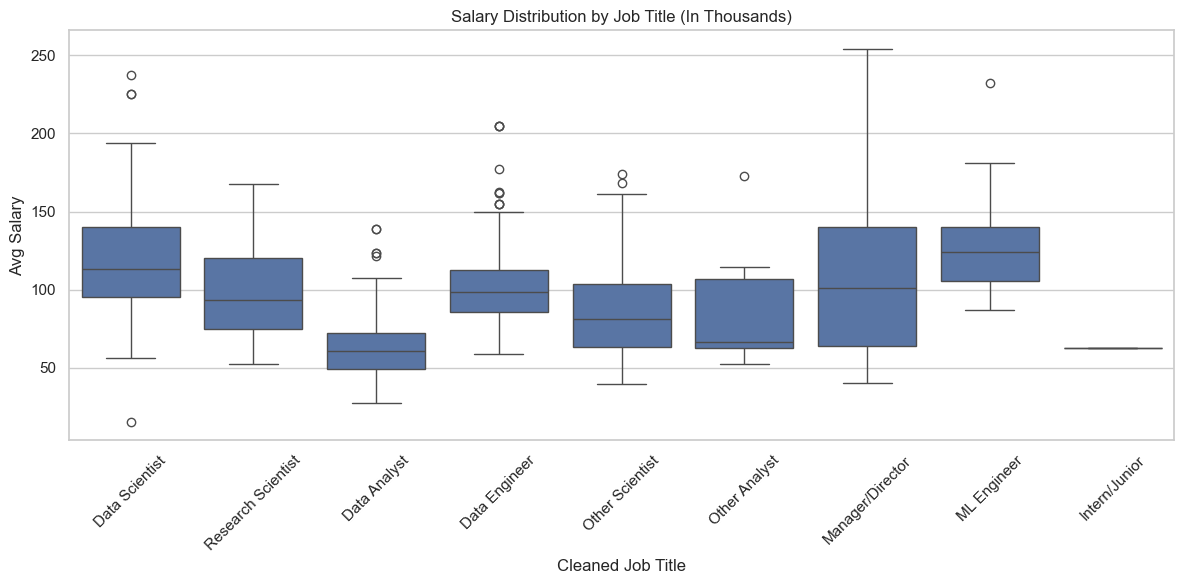

In [416]:
sns.boxplot(data=df, x='Cleaned Job Title', y='Avg Salary')
plt.xticks(rotation=45)
plt.title("Salary Distribution by Job Title (In Thousands)")
plt.tight_layout()
plt.show()

1. **Why did you pick the specific chart?**
   I chose the boxplot chart for its ability to provide a clear representation of the distribution of salary data across different job titles. Boxplots display the median, quartiles, and outliers effectively, making it easier to compare the central tendency, spread, and potential outliers within each job title's salary distribution. The chart helps visualize the variation in salary ranges, offering a more comprehensive view than other types of charts.

2. **What is/are the insight(s) found from the chart?**
   From the chart, several key insights can be drawn:

   * **Data Scientists** have the highest median salary, suggesting that this role tends to offer a higher salary on average compared to others.
   * **Intern/Junior** roles have the lowest salaries, which is expected as these positions are entry-level or require less experience.
   * **Manager/Director** roles show a wide spread in salary, indicating a high variability in the salary range for managerial positions, possibly depending on the company size or other factors.
   * **Outliers** are evident in several categories, especially for high-paying roles like Data Scientist and Research Scientist, where some companies pay significantly higher salaries than others.

3. **Will the gained insights help create a positive business impact? Are there any insights that lead to negative growth? Justify with specific reasons.**

   * **Positive Business Impact**: These insights can help businesses benchmark their salaries against industry standards. Understanding salary distributions for various job titles allows HR departments to make more competitive offers, helping attract top talent in critical roles such as Data Scientists and Engineers.
   * **Potential Negative Growth**: The wide salary ranges observed in managerial and senior technical roles could indicate inequality or inconsistencies in pay. This might lead to dissatisfaction among employees, especially if there is no clear explanation for such discrepancies. If not addressed, this could result in negative employee morale or talent retention issues, which could hinder business growth.


<span style="font-size:15px">**Chart 2: Bar Plot showing Top 10 states by Job Count**</span>

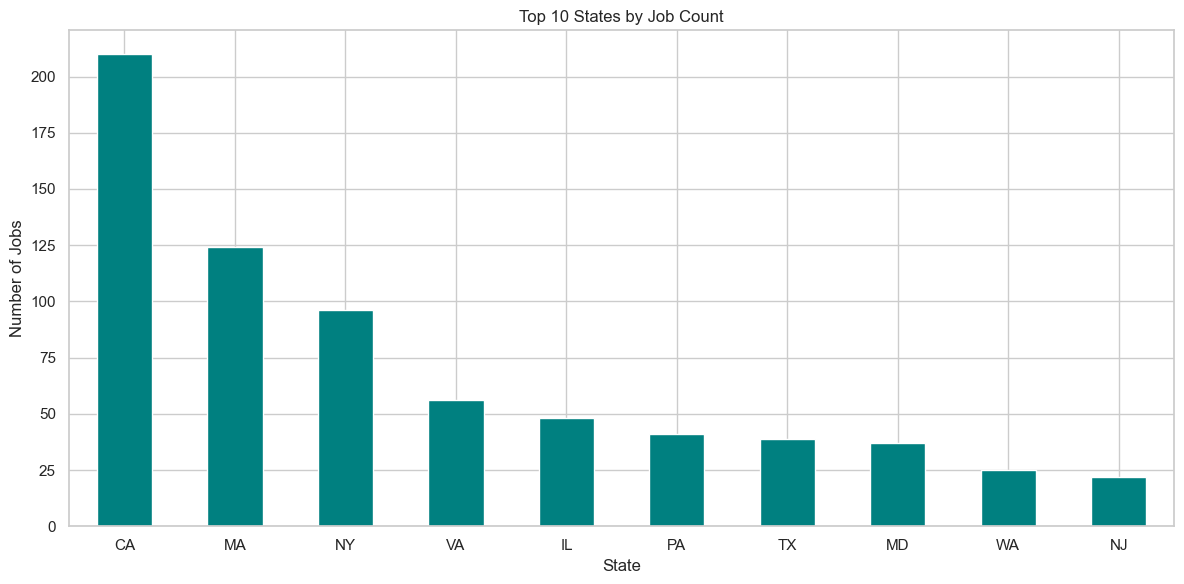

In [364]:
top_states = df['Location_State'].value_counts().head(10)
top_states.plot(kind='bar', color='teal')
plt.title("Top 10 States by Job Count")
plt.xlabel("State")
plt.ylabel("Number of Jobs")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

1. **Why did you pick the specific chart?**
   This bar chart is chosen because it is ideal for visualizing categorical data—specifically, the number of job postings by U.S. states. It clearly displays the comparative job volume across the top 10 states, making it easy to identify which states dominate the data job market.

2. **What is/are the insight(s) found from the chart?**

   * **California (CA)** leads by a wide margin in job postings, indicating a strong concentration of data-related roles.
   * **Massachusetts (MA)** and **New York (NY)** follow, reflecting their prominence in tech and finance industries.
   * Other states like **Virginia (VA)**, **Illinois (IL)**, and **Texas (TX)** also have a notable presence but are significantly behind CA.
   * This distribution suggests a heavy skew of data science jobs toward tech and finance hubs.

3. **Will the gained insights help create a positive business impact? Are there any insights that lead to negative growth? Justify with specific reasons.**

   * **Positive Impact**: Businesses can use this insight to strategically locate their operations in talent-rich states like CA, MA, and NY or target recruitment efforts in those regions. Job seekers can also focus their job searches in these states to increase opportunities.
   * **Negative Insight**: The heavy regional concentration may suggest that companies in underrepresented states face challenges attracting data talent, which could lead to slower tech growth in those areas unless remote opportunities are expanded. This could further widen the economic and technological gap between major tech hubs and other regions.


<span style="font-size:15px">**Chart 3: Histogram Of Average Salary by Company Size**</span>

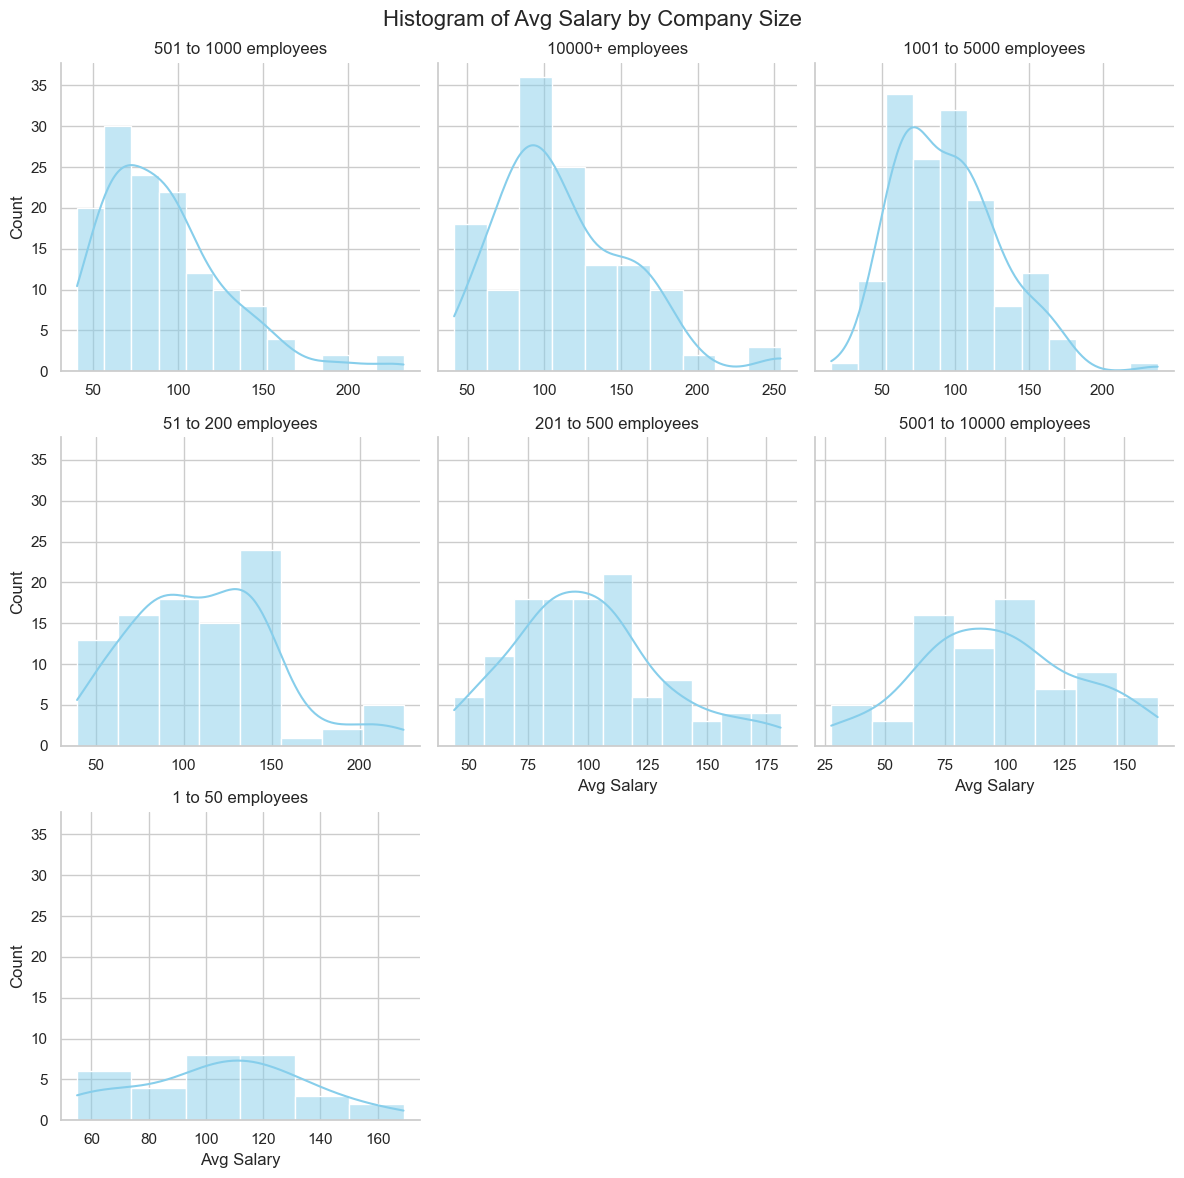

In [378]:
df_filtered = df[df["Size"] != 'Unknown']
g = sns.FacetGrid(df_filtered, col='Size', col_wrap=3, height=4, sharex=False)
g.map(sns.histplot, 'Avg Salary', kde=True, color='skyblue')
g.set_titles(col_template="{col_name}")
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("Histogram of Avg Salary by Company Size", fontsize=16)
plt.tight_layout()
plt.show()

1. **Why did you pick the specific chart?**
   This multi-panel histogram (FacetGrid) was chosen because it allows for a clear comparison of the average salary distribution across different company sizes. It helps identify salary trends and patterns based on the scale of the organization, which is crucial in workforce analytics.

2. **What is/are the insight(s) found from the chart?**

   * Larger companies (e.g., *10,000+ employees* and *1,001–5,000 employees*) tend to have a higher and more stable average salary distribution, with many salaries clustering around \$100K–\$150K.
   * Smaller companies (especially *1 to 50* and *51 to 200 employees*) show more variability and slightly lower salary peaks, although some still offer competitive pay.
   * Mid-sized companies (like *201 to 500* and *501 to 1,000 employees*) demonstrate a broader spread in salary, suggesting varying budget capacities or roles.

3. **Will the gained insights help create a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.**

   * **Positive Impact**: These insights can help job seekers align their expectations and applications based on company size. Similarly, employers can benchmark their compensation structures against peers to remain competitive in talent acquisition.
   * **Negative Insight**: If smaller companies consistently offer lower salaries, they may struggle to attract experienced talent, especially in competitive tech roles. This could slow their growth or innovation unless compensated with benefits, culture, or equityincentives.


<span style="font-size:15px">**Chart 4: Bargraph showing Average Salary by Sector**</span>

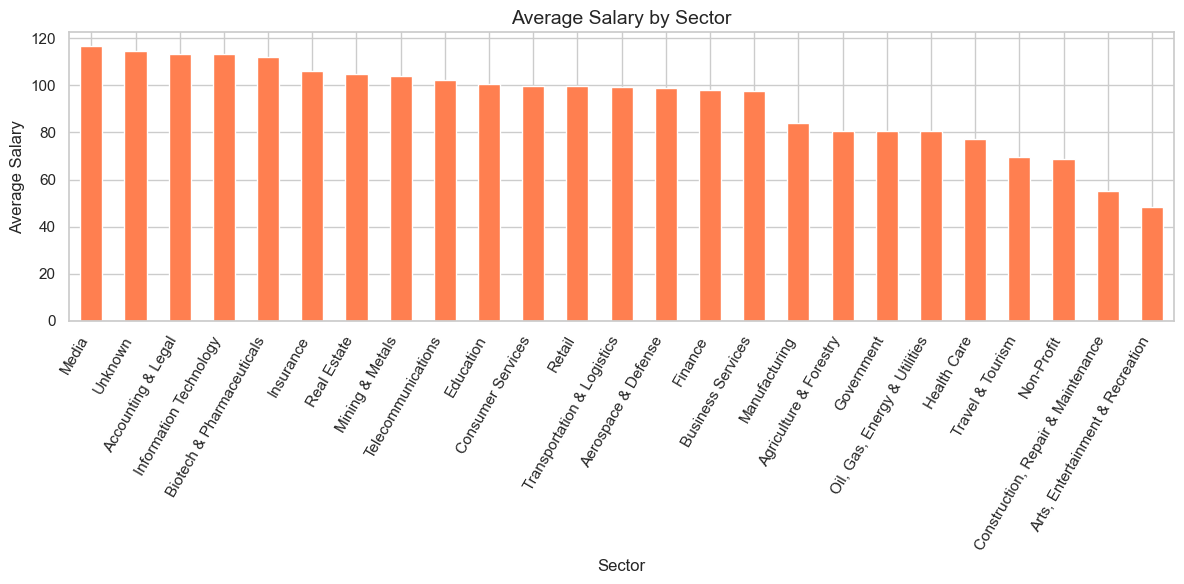

In [382]:
filtered_df = df[df['Sector'] != 'Unknown / Non-Applicable']

# Group and plot
sector_salary = filtered_df.groupby('Sector')['Avg Salary'].mean().sort_values(ascending=False)

# Increase figure size
plt.figure(figsize=(12, 6))
sector_salary.plot(kind='bar', color='coral')

plt.title("Average Salary by Sector", fontsize=14)
plt.ylabel("Average Salary", fontsize=12)
plt.xticks(rotation=60, ha='right')
plt.tight_layout()
plt.show()


1. **Why did you pick the specific chart?**
   This bar chart was chosen because it effectively compares the average salary across various sectors, making it easy to identify which industries offer higher compensation and which ones fall behind. The visual format is straightforward and highlights sectoral disparities clearly.

2. **What is/are the insight(s) found from the chart?**

   * The *Media*, *Accounting & Legal*, *Information Technology*, and *Biotech & Pharmaceuticals* sectors offer the highest average salaries, all above \$100K.
   * On the other hand, sectors like *Arts, Entertainment & Recreation*, *Construction*, and *Non-Profit* have the lowest average salaries, often below \$70K.
   * The *Unknown* sector also shows high salaries, which could imply data entry issues or sectors not properly classified.

3. **Will the gained insights help create a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.**

   * **Positive Impact**: Job seekers can use this to target high-paying sectors for career development, and businesses can benchmark salary expectations. It can also help educational institutions guide students towards lucrative fields.
   * **Negative Insight**: Low-paying sectors may face higher turnover rates or talent shortages if they cannot offer competitive salaries, potentially impacting service quality and long-term growth.


<span style="font-size:15px">**Chart 5: Line Graph showing Company Age with respect to average salary**</span>

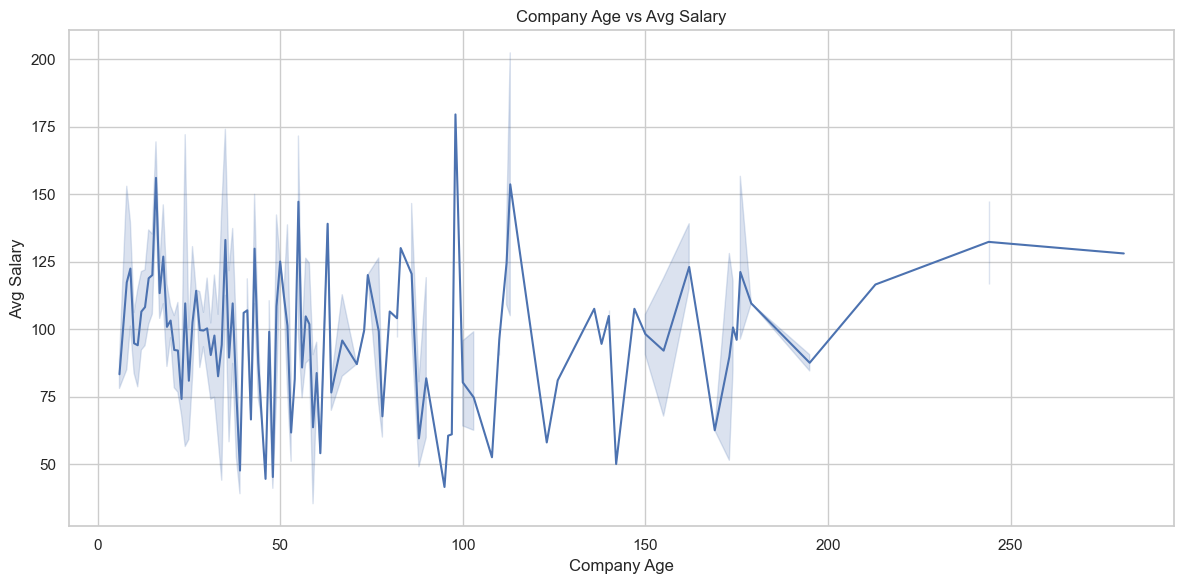

In [386]:
df_filtered = df[df['Founded'].notna()]
df_filtered['Company Age'] = 2025 - df_filtered['Founded']
sns.lineplot(x='Company Age', y='Avg Salary', data=df_filtered)
plt.title("Company Age vs Avg Salary")
plt.tight_layout()
plt.show()

1. **Why did you pick the specific chart?**
   This line plot is appropriate to analyze trends and fluctuations in average salary with respect to company age. It allows us to assess whether older or younger companies tend to offer higher salaries over time, with confidence intervals giving insight into variability.

2. **What is/are the insight(s) found from the chart?**

   * The relationship between company age and average salary is **highly volatile** up to \~100 years.
   * After the 200-year mark, there’s a noticeable **increase in average salary**, though data points are sparse and confidence intervals are wider.
   * There isn’t a clear linear or exponential trend; salaries fluctuate significantly across most age groups.

3. **Will the gained insights help create a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.**

   * **Positive Impact**: Companies can evaluate their salary positioning relative to peers of similar age. It may also help newer companies understand that age alone doesn't strongly determine salary levels.
   * **Negative Insight**: The wide variation suggests **inconsistency or noise** in the data, especially for younger companies. Without further segmentation (e.g. by sector or size), it’s risky to infer strategy solely from age, which might lead to **misinformed HR decisions**.


<span style="font-size:15px">**Chart 6: Barplot showing Top 10 Highest Paying Companies**</span>

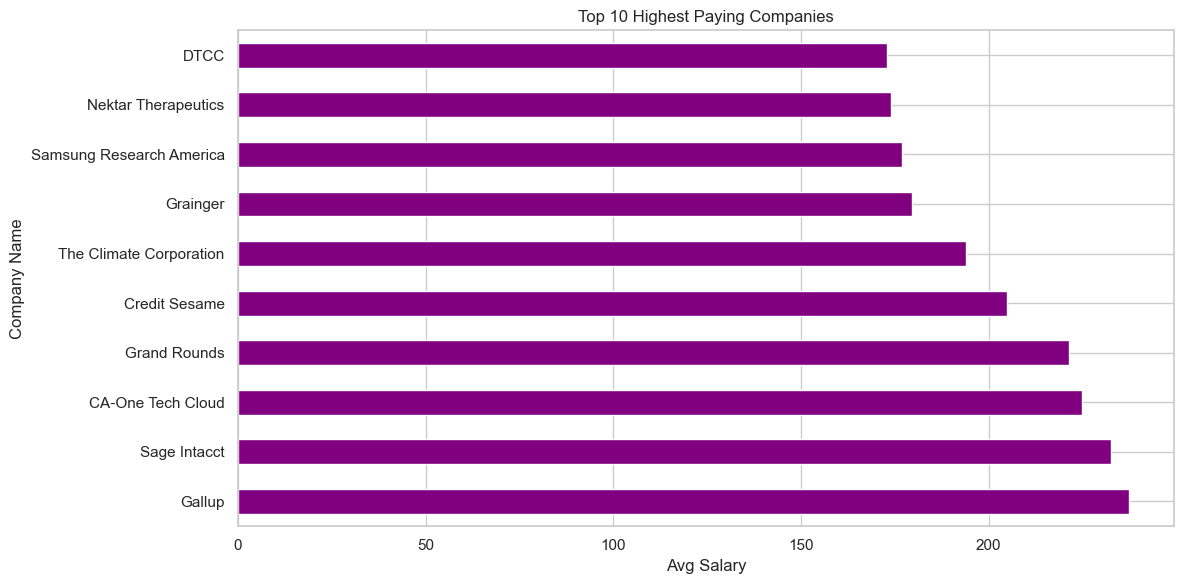

In [388]:
top_companies = df.groupby('Company Name')['Avg Salary'].mean().sort_values(ascending=False).head(10)
top_companies.plot(kind='barh', color='purple')
plt.xlabel("Avg Salary")
plt.title("Top 10 Highest Paying Companies")
plt.tight_layout()
plt.show()

1. **Why did you pick the specific chart?**
   This horizontal bar chart is ideal for comparing the **top 10 highest paying companies**. It provides a clear and direct visual of the companies offering the best compensation, sorted in descending order, which is intuitive and easy to interpret.

2. **What is/are the insight(s) found from the chart?**

   * **Gallup** leads the list with the highest average salary among all.
   * All top-paying companies offer salaries above **\$170K**, suggesting a high compensation benchmark for elite firms.
   * The list includes companies from diverse industries, including **tech (Samsung Research America, CA-One Tech Cloud)**, **healthcare (Grand Rounds)**, **finance (Credit Sesame)**, and **consulting (Gallup)**.

3. **Will the gained insights help create a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.**

   * **Positive Impact**: This chart is useful for **competitive benchmarking**. Companies can compare their pay scale against top players and consider adjusting compensation to attract top talent.
   * It also helps **job seekers and recruiters** identify where the most lucrative opportunities are.
   * **No direct negative growth**, but if lower-paying firms try to match these salaries **without revenue support**, it could affect profitability. Hence, salary benchmarking should be aligned with **business capacity and market value.**


<span style="font-size:15px">**Chart 7: Grouped bar chart showing comparison between min avg and max salary**</span>

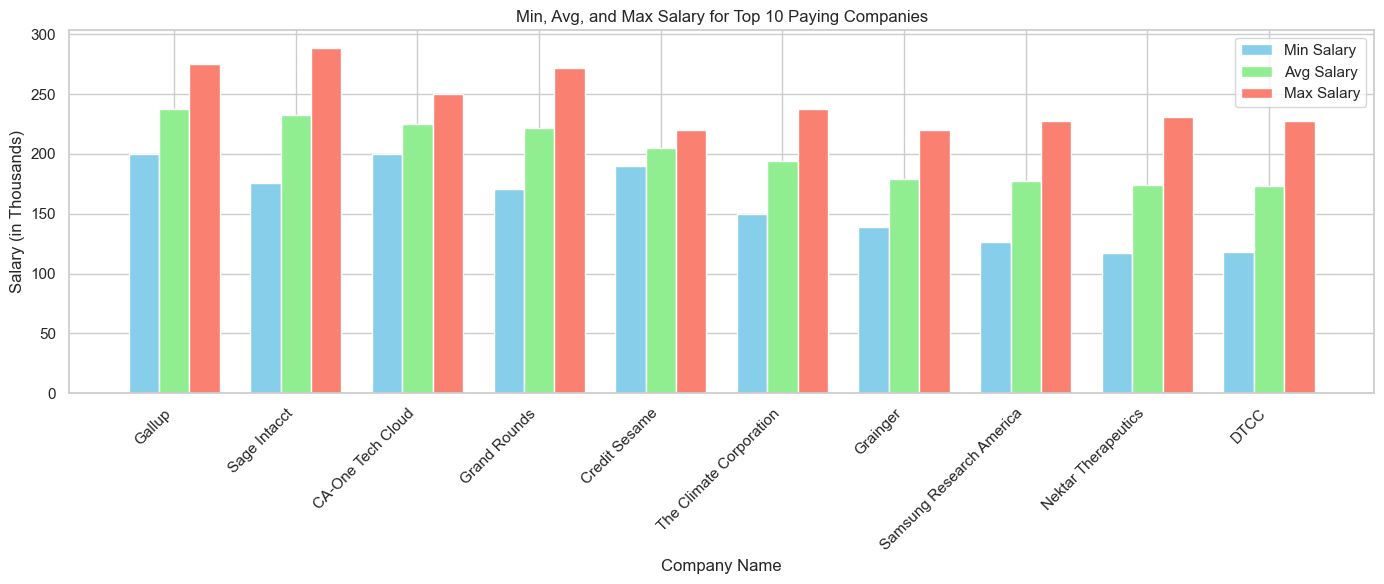

In [400]:
# Group by company and compute mean salaries
top10 = df.groupby('Company Name').agg({
    'Min Salary': 'mean',
    'Avg Salary': 'mean',
    'Max Salary': 'mean'
}).sort_values(by='Avg Salary', ascending=False).head(10)

# Setup bar positions
companies = top10.index.tolist()
x = np.arange(len(companies))  # positions for each company

bar_width = 0.25

# Plot each bar
plt.figure(figsize=(14, 6))
plt.bar(x - bar_width, top10['Min Salary'], width=bar_width, label='Min Salary', color='skyblue')
plt.bar(x, top10['Avg Salary'], width=bar_width, label='Avg Salary', color='lightgreen')
plt.bar(x + bar_width, top10['Max Salary'], width=bar_width, label='Max Salary', color='salmon')

# Formatting
plt.xticks(ticks=x, labels=companies, rotation=45, ha='right')
plt.xlabel("Company Name")
plt.ylabel("Salary (in Thousands)")
plt.title("Min, Avg, and Max Salary for Top 10 Paying Companies")
plt.legend()
plt.tight_layout()
plt.show()


1. **Why did you pick the specific chart?**
   This **grouped bar chart** is ideal for showing the **distribution of min, average, and max salary** across the **top 10 highest paying companies**. It allows for a side-by-side comparison of salary ranges within each company, providing insights into pay spread and consistency.

2. **What is/are the insight(s) found from the chart?**

   * **CA-One Tech Cloud** offers the highest **maximum salary (\~\$290K)** and also maintains a **high minimum (\~\$200K)**, indicating a consistently high pay band.
   * **Gallup** shows the highest **average salary (\~\$240K)** with a narrower spread between min and max, suggesting **more uniform compensation**.
   * Some companies like **DTCC and Nektar Therapeutics** have a **wider salary gap**, which may imply **greater variance in roles or experience levels**.

3. **Will the gained insights help create a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.**

   * **Positive Impact**: This chart is useful for **internal pay structure analysis**. Companies can benchmark **their pay dispersion** against peers and decide if they want to **maintain, narrow, or widen** their salary range.
   * It helps in **talent strategy decisions**, e.g., whether to attract specialists with high salary peaks or aim for uniformity.
   * **Negative Insight**: Large salary gaps (e.g., DTCC) might suggest **inequity or risk of employee dissatisfaction** if not justified by role differences. Hence, **internal fairness** should be monitored alongside market competitiveness.


<span style="font-size:15px">**Chart 8: Histogram showing average revenue with respect to average salary**</span>

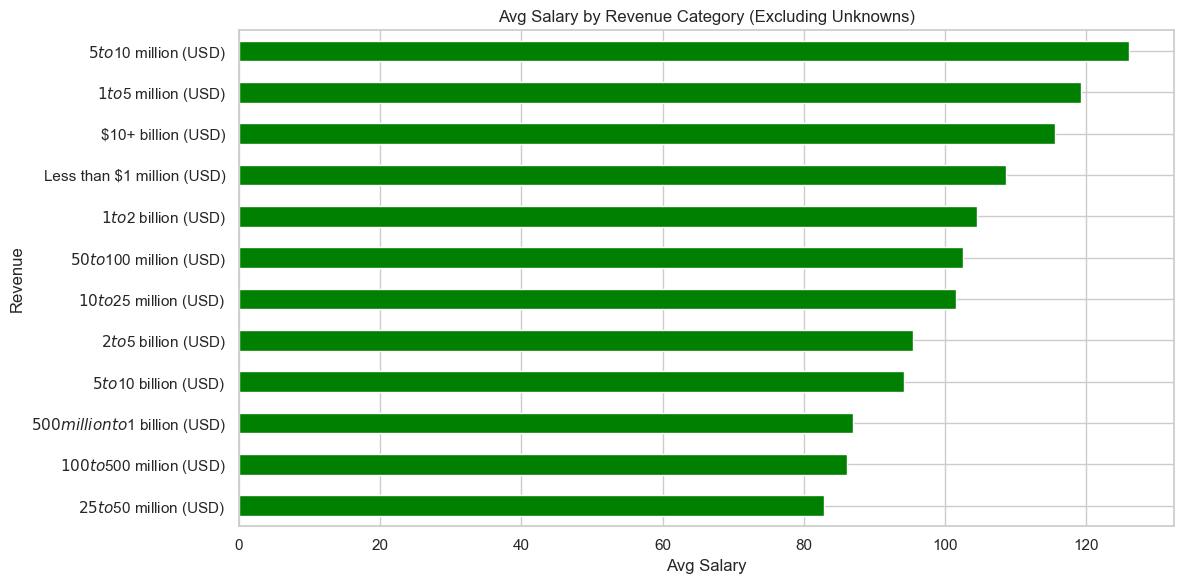

In [406]:
# Filter out Unknown and Unknown / Non-Applicable revenue entries
filtered_df = df[~df['Revenue'].isin(['Unknown', 'Unknown / Non-Applicable'])]

# Group and plot
revenue_salary = filtered_df.groupby('Revenue')['Avg Salary'].mean().sort_values()
revenue_salary.plot(kind='barh', color='green')

# Formatting
plt.title("Avg Salary by Revenue Category (Excluding Unknowns)")
plt.xlabel("Avg Salary")
plt.tight_layout()
plt.show()


1. **Why did you pick the specific chart?**
   This **horizontal bar chart** was chosen because it effectively compares **average salary across various revenue categories**. It handles long revenue labels well and clearly illustrates how salary levels vary with company revenue — especially when there are many categories with slightly different values.

2. **What is/are the insight(s) found from the chart?**

   * Surprisingly, **smaller companies** (e.g., **\$5–10 million** and **\$1–5 million** revenue) offer **higher average salaries** than many larger companies.
   * Some **large revenue groups** like **\$10+ billion** also pay well but are **not the top**.
   * **Mid-tier revenue companies** (e.g., **\$100–500 million**, **\$500 million–1 billion**) offer **relatively lower salaries**, possibly due to stricter compensation budgets or more structured pay scales.

3. **Will the gained insights help create a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.**

   * **Positive Impact**: Startups or small companies can use this to **attract talent** by **offering competitive pay** — even without massive revenue. It also shows that **salary isn't always tied directly to revenue**, which helps candidates target employers more strategically.
   * **Negative Insight**: Larger firms assuming they are competitive in pay due to their size may face **talent leakage** to smaller firms offering better compensation. They might need to **re-evaluate their salary benchmarks** to retain skilled employees.


<span style="font-size:15px">**Chart 8: Variation of Ownership Type with respect to total no of companies**</span>

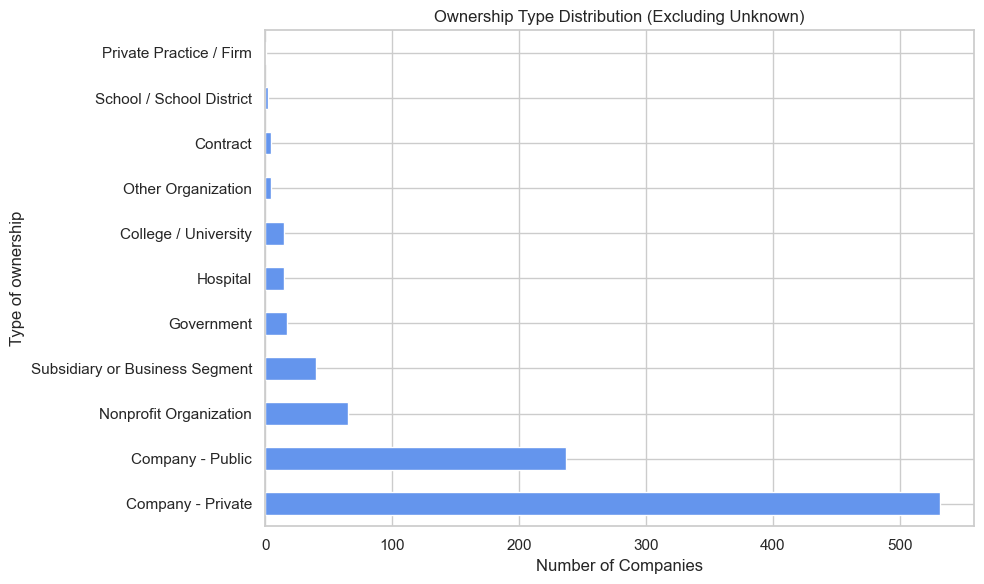

In [641]:
# Filter out 'Unknown' and 'Unknown / Non-Applicable'
filtered_ownership = df[~df['Type of ownership'].isin(['Unknown', 'Unknown / Non-Applicable'])]

# Plot
filtered_ownership['Type of ownership'].value_counts().plot(
    kind='barh',
    figsize=(10, 6),
    color='cornflowerblue'
)
plt.title("Ownership Type Distribution (Excluding Unknown)")
plt.xlabel("Number of Companies")
plt.tight_layout()
plt.show()


1. **Why did you pick the specific chart?**
   This **horizontal bar chart** was selected because it clearly illustrates the **distribution of companies by ownership type**, making it easy to compare categories — especially when label names are long and vary in frequency.

2. **What is/are the insight(s) found from the chart?**

   * The vast majority of companies in the dataset are **privately owned**.
   * **Public companies** and **nonprofits** follow, but with significantly lower counts.
   * **Government**, **hospital**, and **education-related ownership types** are much less frequent.
   * Very few companies fall under **contract**, **school district**, or **private practice** ownership.

3. **Will the gained insights help create a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.**

   * **Positive Impact**: Job seekers or recruiters can prioritize targeting **private companies**, which dominate the dataset and likely offer more roles. This can **streamline job targeting strategies**.
   * **Negative Insight**: The low number of **government or nonprofit** organizations might reflect **limited hiring or data representation**. Candidates seeking such roles may need to **look beyond this dataset**, or employers in these categories may face **reduced visibility** if they don’t improve their digital presence.


<span style="font-size:15px">**Chart 9: Correlation heatmap showing correlation between numerical columns**</span>

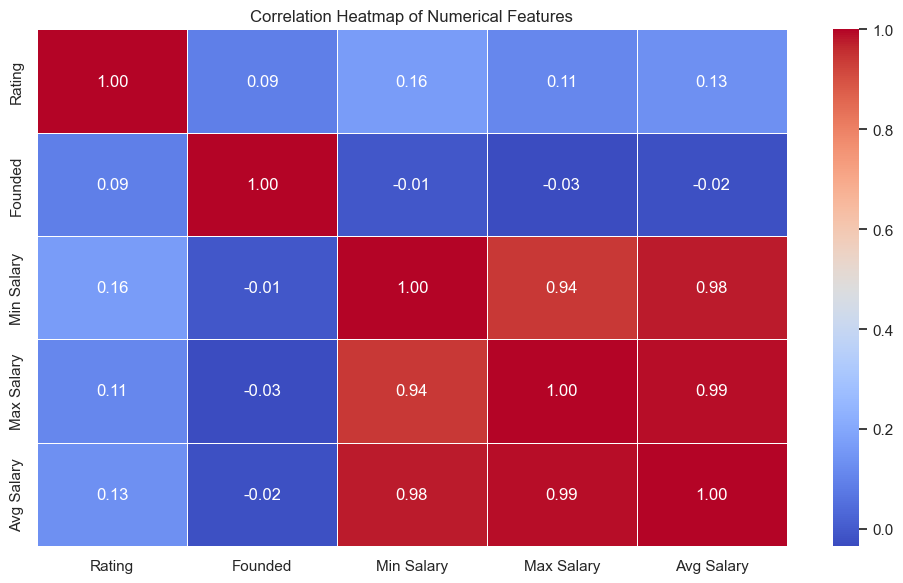

In [420]:
numeric_df = train.select_dtypes(include='number')

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title("Correlation Heatmap of Numerical Features")
plt.tight_layout()
plt.show()




**1. Why did you pick the specific chart?**
This **correlation heatmap** was chosen because it efficiently displays the **strength and direction of relationships** between numerical features in a dataset. It allows for **quick visual identification of highly correlated variables**, using both color gradients and exact values.

---

**2. What is/are the insight(s) found from the chart?**

* **Avg Salary** is extremely positively correlated with both **Min Salary (0.98)** and **Max Salary (0.99)** — which is expected, since it’s derived from them.
* **Min Salary** and **Max Salary** also have a **strong positive correlation (0.94)**, indicating consistency in salary ranges within companies.
* **Rating** has a **weak positive correlation** with salary values (ranging from 0.11 to 0.16), suggesting **better-rated companies may offer slightly higher pay**, though the relationship is weak.
* **Year Founded** has near-zero or **slightly negative correlation** with all other features, implying that **company age doesn’t significantly influence salariesns based on this.


<span style="font-size:15px">**Chart 10: Pairplot showing salary distribution**</span>

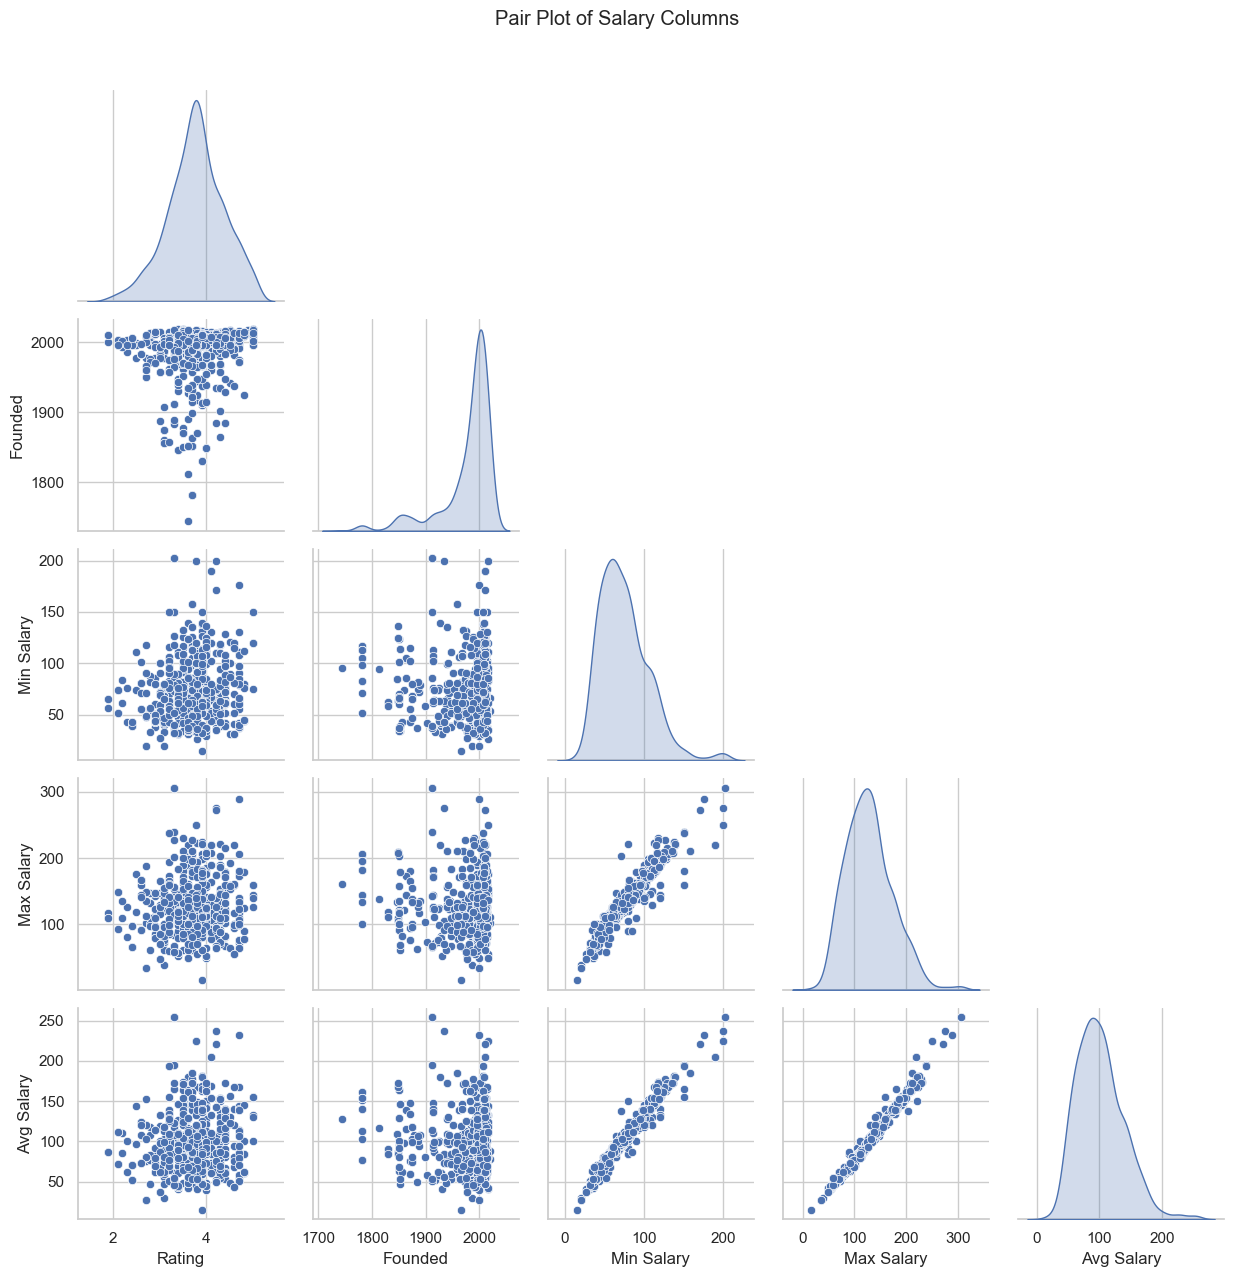

In [424]:
salary_df = df
sns.pairplot(salary_df, corner=True, diag_kind='kde')
plt.suptitle("Pair Plot of Salary Columns", y=1.02)
plt.tight_layout()
plt.show()

1. **Why did you pick the specific chart?**
   The **pair plot** (also known as a scatterplot matrix) was chosen because it is ideal for visualizing **pairwise relationships** between multiple continuous numerical variables. In this case, the chart effectively displays relationships among variables such as **Rating, Founded Year, Min Salary, Max Salary, and Avg Salary**. It allows quick detection of correlations, patterns, clusters, and outliers across all variable combinations.

2. **What is/are the insight(s) found from the chart?**

   * **Strong Positive Correlation Between Salary Columns**: There is a clear **linear relationship** between Min Salary, Max Salary, and Avg Salary. This is expected, as Avg Salary is likely derived from the other two.
   * **No Strong Relationship Between Salary and Rating or Founded**: There is **no clear trend** or correlation between salaries and company Rating or the Founded year — the scatterplots for these combinations appear dispersed without a consistent pattern.
   * **Salaries are Normally Distributed**: The distribution plots on the diagonal show that salary-related variables have **roughly normal distributions**, though possibly right-skewed in the case of Max Salary.
   * **Outliers and Spread**: Some **outliers** are noticeable, especially in the salary ranges, which could indicate unusually high-paying jobs.

This plot helps in feature selection for modeling and guides further analysis by highlighting which variables are most interrelated.


<span style="font-size:25px; font-weight:bold">Hypothesis Testing </span>

<span style="font-size:15px; font-weight:bold">Hypothetical Statement 1:
The average salary in private companies is different from public companies. </span>

**Null Hypothesis (H₀)**:
There is no difference in the average salary between private and public companies.

**Alternate Hypothesis (H₁)**:
There is a significant difference in the average salary between private and public companies.

We use **Independent t-test** because:

We're comparing the means of two independent groups (Private vs Public).

The dependent variable (Avg Salary) is continuous and approximately normally distributed.

Sample sizes may differ, so equal_var=False (Welch’s t-test) is safer.



In [434]:
from scipy.stats import ttest_ind
private = df[df['Type of ownership'] == 'Company - Private']['Avg Salary'].dropna()
public = df[df['Type of ownership'] == 'Company - Public']['Avg Salary'].dropna()
t_stat, p_value = ttest_ind(private, public, equal_var=False)
print(f"T-statistic: {t_stat:.4f}, P-value: {p_value:.4f}")

T-statistic: -2.9340, P-value: 0.0035


Since the p-value (0.0035) < 0.05, we reject the null hypothesis at the 5% significance level.This means there is a statistically significant difference in the average salaries offered by private and public companies.

<span style="font-size:15px; font-weight:bold">Hypothetical Statement 2: Technology sector jobs offer higher average salaries than the health care sector.</span>

**Null Hypothesis H₀**: The average salary in the Technology and Health Care sectors is the same.

**Alternate Hypothesis H₁**: The average salary in the Technology sector is greater than in the Health Care sector.

A **one-tailed t-test** is appropriate because:

We're testing if one group mean is greater than another.

The two groups (sectors) are independent, and the outcome variable (salary) is continuous.

In [447]:
from scipy.stats import ttest_ind
tech = df[df['Sector'] == 'Information Technology']['Avg Salary'].dropna()
health = df[df['Sector'] == 'Health Care']['Avg Salary'].dropna()
t_stat, p_value = ttest_ind(tech, health, alternative='greater')
print(f"T-statistic: {t_stat:.4f}, P-value: {p_value:.4f}")

T-statistic: 5.6714, P-value: 0.0000


Since the p-value is far less than 0.05, we reject the null hypothesis.There is a statistically significant difference in average salaries, and the data supports the claim that companies with more than 500 employees tend to offer higher salaries compared to smaller companies.

<span style="font-size:15px; font-weight:bold">Hypothetical Statement 3: There is an association between company size and the type of ownership.</span>

**Null Hypothesis H₀**: Company size and type of ownership are independent.

**Alternate Hypothesis H₁**: Company size and type of ownership are associated not independent

The **Chi-Square Test** of Independence is used because:

Both variables are categorical (Company Size, Ownership Type).

We're checking if they are related or independent.

In [462]:
import scipy.stats as stats
import pandas as pd

# Create contingency table
contingency = pd.crosstab(df['Size'], df['Type of ownership'])

# Perform chi-squared test
chi2, p_value, dof, expected = stats.chi2_contingency(contingency)
print(f"Chi-square: {chi2:.4f}, P-value: {p_value:.4f}")


Chi-square: 781.2687, P-value: 0.0000


There is a statistically significant association between sector and average salary. This means salary levels do vary across different sectors, supporting the idea that industry plays a role in determining compensation.

<span style="font-size:25px">**Data Pre-Processing , Model training and Fitting**</span>

In [649]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

X = train.drop(columns=['Min Salary', 'Max Salary', 'Avg Salary'])
Y = train[['Min Salary', 'Max Salary', 'Avg Salary']]

categorical_cols = ['Company Name', 'Headquarters', 'Size', 'Type of ownership', 
                    'Sector', 'Revenue', 'Location_State', 'Cleaned Job Title']
numerical_cols = ['Rating', 'Founded']
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
        ('num', 'passthrough', numerical_cols)
    ]
)

X_processed = preprocessor.fit_transform(X)

X_processed = X_processed.toarray()

X_train, X_test, Y_train, Y_test = train_test_split(X_processed, Y, test_size=0.2, random_state=42)

In [656]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define all models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'XGBoost': XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
}

# Loop over each model and each target
for name, model in models.items():
    print(f"\n{name} Performance:")
    
    for target in ['Min Salary', 'Max Salary', 'Avg Salary']:
        model.fit(X_train, Y_train[target])
        Y_pred = model.predict(X_test)

        mae = mean_absolute_error(Y_test[target], Y_pred)
        mse = mean_squared_error(Y_test[target], Y_pred)
        r2 = r2_score(Y_test[target], Y_pred)

        print(f"  ➤ Target: {target}")
        print(f"     MAE:  {mae:.2f}")
        print(f"     MSE:  {mse:.2f}")
        print(f"     R²:   {r2:.2f}")



Linear Regression Performance:
  ➤ Target: Min Salary
     MAE:  1170608699.76
     MSE:  202598840021117108224.00
     R²:   -200036808297671776.00
  ➤ Target: Max Salary
     MAE:  2381826113.32
     MSE:  838751994415395110912.00
     R²:   -356853335113074560.00
  ➤ Target: Avg Salary
     MAE:  1776217406.46
     MSE:  466450651636771454976.00
     R²:   -297395403385931392.00

Random Forest Performance:
  ➤ Target: Min Salary
     MAE:  10.71
     MSE:  269.74
     R²:   0.73
  ➤ Target: Max Salary
     MAE:  17.20
     MSE:  666.09
     R²:   0.72
  ➤ Target: Avg Salary
     MAE:  13.54
     MSE:  417.45
     R²:   0.73

Gradient Boosting Performance:
  ➤ Target: Min Salary
     MAE:  16.03
     MSE:  413.58
     R²:   0.59
  ➤ Target: Max Salary
     MAE:  25.27
     MSE:  1056.82
     R²:   0.55
  ➤ Target: Avg Salary
     MAE:  20.17
     MSE:  675.83
     R²:   0.57

XGBoost Performance:
  ➤ Target: Min Salary
     MAE:  13.67
     MSE:  333.91
     R²:   0.67
  ➤ Target: M

<span style="font-size:25px; font-weight:bold">Conclusion</span>

This project focuses on predicting salary ranges—minimum, maximum, and average salaries—for various job listings using a dataset sourced from Glassdoor. The dataset includes job-related and company-specific features such as job title, company size, revenue, type of ownership, sector, and geographic location. Extensive data preprocessing was performed, including handling missing values, encoding categorical variables, and splitting the data into training and testing sets. Multiple regression models were implemented—Linear Regression, Random Forest, Gradient Boosting, and XGBoost—to predict the salary values. Among these, tree-based ensemble methods like Random Forest and XGBoost performed significantly better than Linear Regression, achieving higher R² scores and lower error metrics. Additionally, exploratory data analysis was conducted through various visualizations to uncover insights such as the distribution of job roles, salary trends by sector and revenue, and the influence of company characteristics on salary. Hypothesis testing was also carried out to validate assumptions about salary differences based on job roles and company attributes. The final models were used to predict salaries for new, unseen data entries, and the results were saved for further evaluation. Overall, the project demonstrates a full machine learning pipeline—starting from data cleaning and exploration to model evaluation and deployment—providing valuable insights for salary prediction and business decision-making.
